In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/nba_2022-23_stats.csv')
df_position = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/sql_topic2.csv')
df_age = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/sql_topic4.csv')
df_rank = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/sql_topic5.csv')
df_team = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/sql_topic3.csv')
df_5dim = pd.read_csv('/Users/reecewu/Desktop/DAproject/NBAstats_231020/sql_topic1.csv')

In [4]:
df.head()

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    467 non-null    object 
 1   Salary         467 non-null    int64  
 2   Position       467 non-null    object 
 3   Age            467 non-null    int64  
 4   Team           467 non-null    object 
 5   GP             467 non-null    int64  
 6   GS             467 non-null    int64  
 7   MP             467 non-null    float64
 8   FG             467 non-null    float64
 9   FGA            467 non-null    float64
 10  FG%            466 non-null    float64
 11  3P             467 non-null    float64
 12  3PA            467 non-null    float64
 13  3P%            454 non-null    float64
 14  2P             467 non-null    float64
 15  2PA            467 non-null    float64
 16  2P%            463 non-null    float64
 17  eFG%           466 non-null    float64
 18  FT        

## Part 1. Exploratory Data Analysis

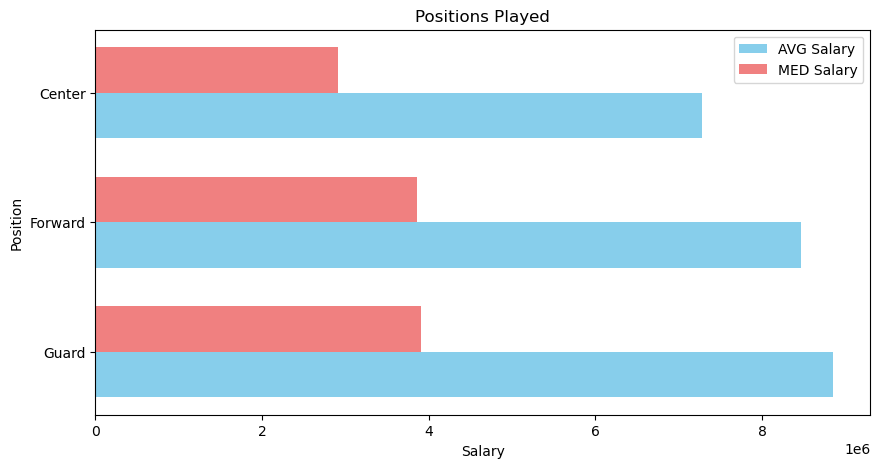

In [6]:
# The Relationship Between Positions Played and Salary

plt.figure(figsize = (10, 5))

x = np.arange(len(df_position['cat_position']))

bar_width = 0.35

plt.barh(x - bar_width/2, df_position['average'], bar_width, label = 'AVG Salary', color = 'skyblue')
plt.barh(x + bar_width/2, df_position['median'], bar_width, label = 'MED Salary', color = 'lightcoral')

plt.yticks(x, df_position['cat_position'])

plt.title('Positions Played')
plt.xlabel('Salary')
plt.ylabel('Position')

plt.grid(False)
plt.legend()

plt.show()

### The Relationship Between Positions Played and Salary

The current NBA features a faster pace of play on both offense and defense, making high mobility a crucial skill, even for centers. From the chart, it is evident that the average and median salaries of centers lag significantly behind those of guards and forwards, which may also reflect the prevailing style of play in today's NBA.

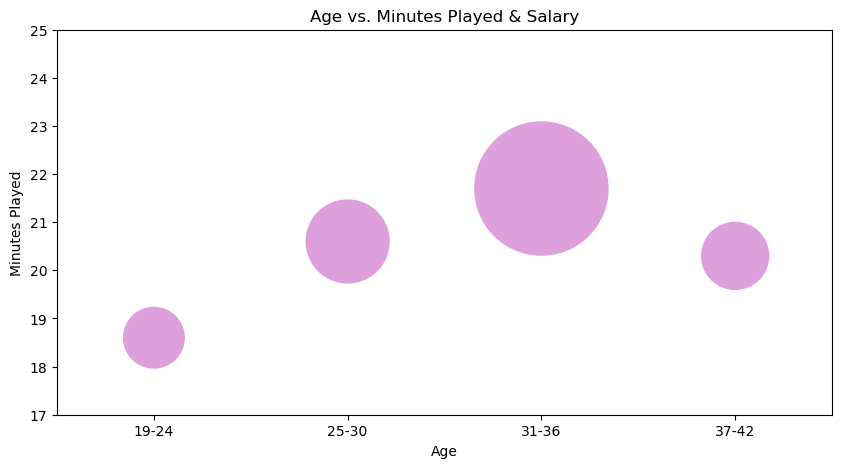

In [7]:
# The Relationship between Age, Minutes Played and Salary

plt.figure(figsize=(10, 5))

plt.scatter(df_age['age_category'], df_age['ave_minutes_played'], s = df_age['med_salary'] * 0.0008, color = 'plum')

plt.xlim(-0.5, 3.5)
plt.ylim(17, 25) 

plt.title("Age vs. Minutes Played & Salary")
plt.xlabel("Age")
plt.ylabel("Minutes Played")

plt.show()

### The Relationship between Age, Minutes Played and Salary

From the data, it can be observed that the age range of 19-24 is roughly the point of entry into the league, during which players usually receive basic salaries and playing time before showcasing their abilities. Approximately between the ages of 25-36, players are in their best physical condition and possess sufficient experience. During this period, their playing time and salaries peak. However, as they continue to age, their performance starts to decline, impacting the extent of both playing time and salaries.

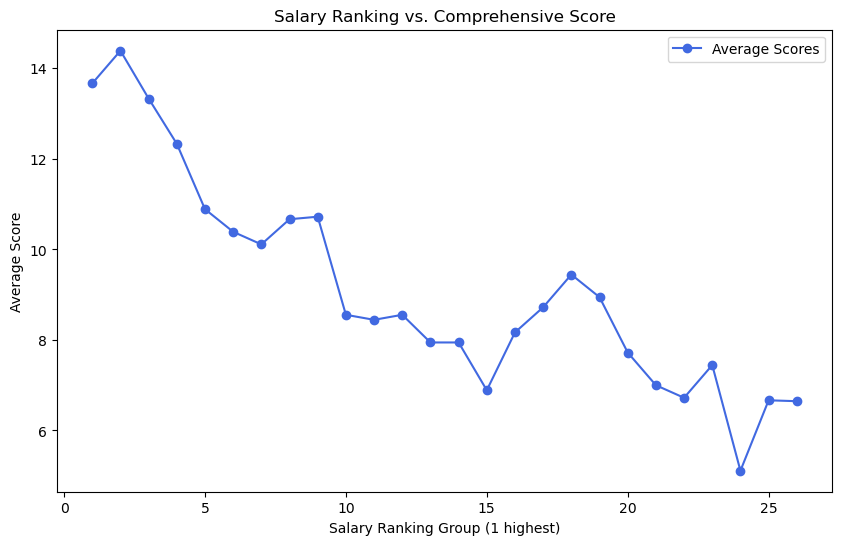

In [8]:
# Use The 3 Most Comprehensive Metrics: PER, WS and VORP to Understand The Relationship between Performance and Salary

group_size = 18

result = df_rank.groupby(df_rank.index // group_size).agg({'salary_rank': 'mean', 'total_score': 'mean'})

plt.figure(figsize=(10, 6))

plt.plot(result.index + 1, result['total_score'], marker='o', linestyle='-', color='royalblue', label='Average Scores')

plt.title('Salary Ranking vs. Comprehensive Score')
plt.xlabel('Salary Ranking Group (1 highest)')
plt.ylabel('Average Score')

plt.grid(False)
plt.legend()
plt.show()

### Use The 3 Most Comprehensive Metrics to Know The Relationship between Performance and Salary

PER, WS, and VORP are the three most valuable indicators when assessing NBA player performance. Each of these three indicators is assigned a score ranging from 1 to 5 based on percentages and then summed (maximum score of 15). Overall, before the median salary ranking, there is a positive correlation between score and salary. However, after the median salary ranking, the correlation between salary and score significantly decreases.

In [18]:
# Calculate The Total Salary of Each Team

import folium
from IPython.display import Image

m = folium.Map(location = [37.0, -95.0], zoom_start = 4)

for index, row in df_team.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    salary = row['team_salary']
    name = row['current_team']

    fill_color = folium.LinearColormap(['darkorange', 'darkblue'], vmin=df_team['team_salary'].min(), vmax=df_team['team_salary'].max())(salary)
    
    folium.CircleMarker(
        location = [latitude, longitude],
        radius = salary * 0.00000015, 
        popup = f'{name}<br>Salary: ${salary}',
        fill = True,
        color = 'none',
        fill_color = fill_color,
        fill_opacity = 0.7,
    ).add_to(m)

    folium.Marker(
        location=[latitude, longitude],
        icon=folium.DivIcon(html=f'<div>{name}</div>'),
    ).add_to(m)

Image(filename='NBAPlayerSalaries_map.png')

![NBAPlayerSalaries_map](images/NBAPlayerSalaries_map.png?raw=true)


### Calculate The Total Salary of Each Team

In the Western Conference of the NBA, the Los Angeles Clippers (LAC) hold the top spot in total team salary, making them the highest-paying team in the league. The Clippers roster features a constellation of star players, including Leonard, George, Wall, and Westbrook. Other nearby teams, such as the Phoenix Suns (PHO) and the Golden State Warriors (GSW), also maintain substantial team salaries. In the Eastern Conference, the Milwaukee Bucks (MIL), the Miami Heat (MIA), and the Boston Celtics (BOS) establish themselves as formidable forces with significantly high team salaries.

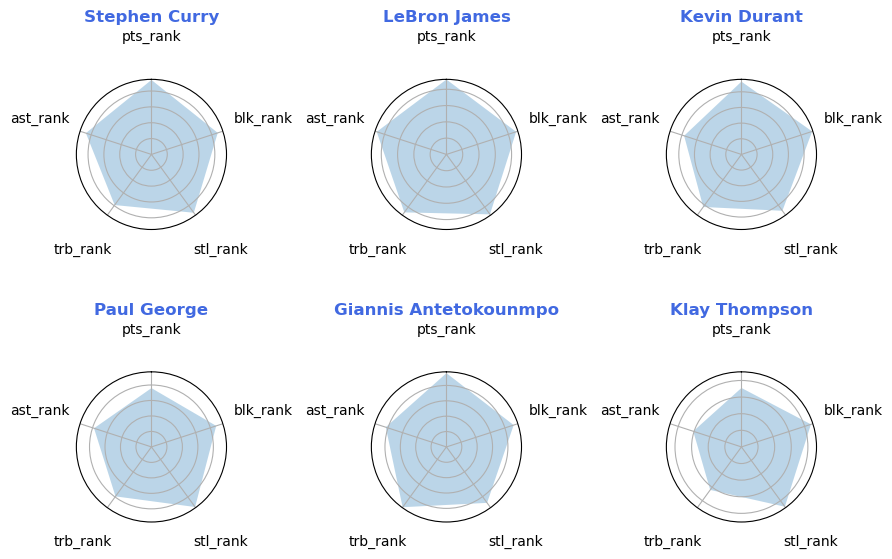

In [10]:
# Five-Dimensional Indicators of The Top Players

select_rows = [0, 1 ,2, 4, 7, 8]

labels = ['pts_rank', 'ast_rank', 'trb_rank', 'stl_rank', 'blk_rank']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint = False).tolist()

fig, axes = plt.subplots(2, 3, figsize=(9, 6), subplot_kw={'polar': True})

for i, ax in zip(select_rows, axes.flatten()):
    stats = df_5dim.loc[i, labels].values
    ax.fill(angles, stats, alpha=0.3)
    ax.set_title(df_5dim['player_name'][i], color='royalblue', fontweight='bold')
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.tick_params(axis='x', pad=20)
    ax.set_theta_offset(np.pi/2)

plt.tight_layout()
plt.show()

### Five-Dimensional Indicators of The Top Players

In the list of top-paid NBA players, LeBron James stands out as the most well-rounded player in terms of skills and abilities. Curry also exhibits excellent scoring and assisting skills, while Antetokounmpo excels in rebounding. In contrast, George and Thompson's performances are not particularly outstanding.

## Part 2. Regression Analysis

In [11]:
from sklearn.model_selection import train_test_split

df2 = df.dropna()

X = df2[['Player Name', 'Age','GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
        '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
        'STL', 'BLK', 'TOV','PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
        'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
        'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]
y = df2['Salary']

train_df, test_df, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

X_train = train_df.drop(['Player Name'], axis=1)
X_test = test_df.drop(['Player Name'], axis=1)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state = 42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state = 42)),
    ('Support Vector Regressor', SVR(kernel = 'linear')),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state = 42))
]

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

for name, model in models:
    model.fit(X_train_scale, y_train)
    y_pred = model.predict(X_test_scale)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f'Model Name: {name}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}')
    print('-----')

Model Name: Linear Regression
Root Mean Squared Error: 7015640.919810332
R-squared: 0.6512271079916869
-----
Model Name: Decision Tree Regressor
Root Mean Squared Error: 8709439.174944961
R-squared: 0.46248771029695335
-----
Model Name: Random Forest Regressor
Root Mean Squared Error: 5894215.343614038
R-squared: 0.7538158917725801
-----
Model Name: Support Vector Regressor
Root Mean Squared Error: 13635709.208722426
R-squared: -0.3175390001027967
-----
Model Name: Gradient Boosting Regressor
Root Mean Squared Error: 6115875.497107266
R-squared: 0.7349515376945521
-----


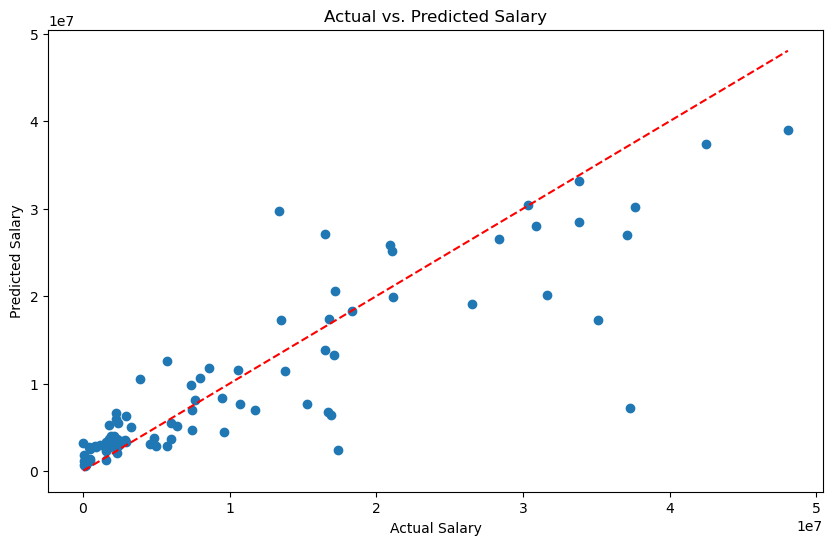

Root Mean Squared Error:  5894215.343614038
R-squared:  0.7538158917725801


In [14]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train_scale, y_train)
y_pred = rf_model.predict(X_test_scale)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

df_pred = pd.DataFrame({
    'Player Name' : test_df['Player Name'],
    'Actual Salary' : y_test,
    'Predicted Salary' : y_pred 
})

plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '--', color = 'red')

plt.show()

print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)

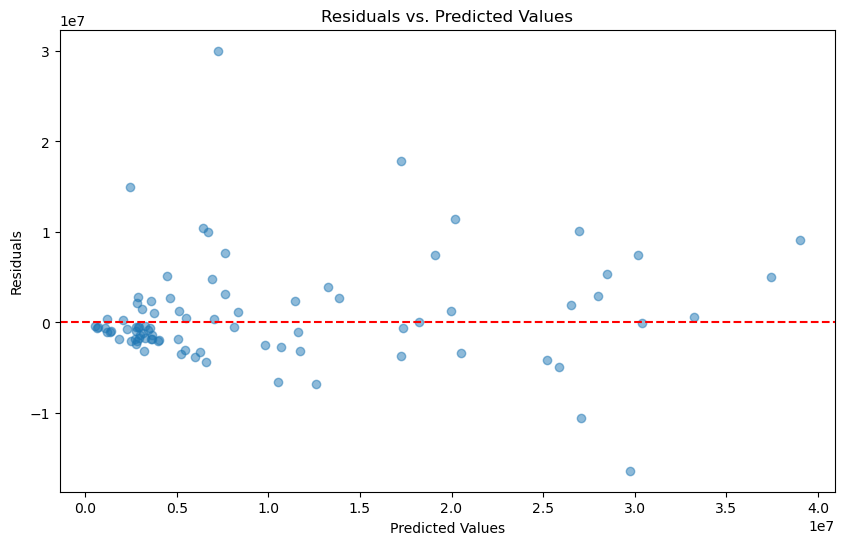

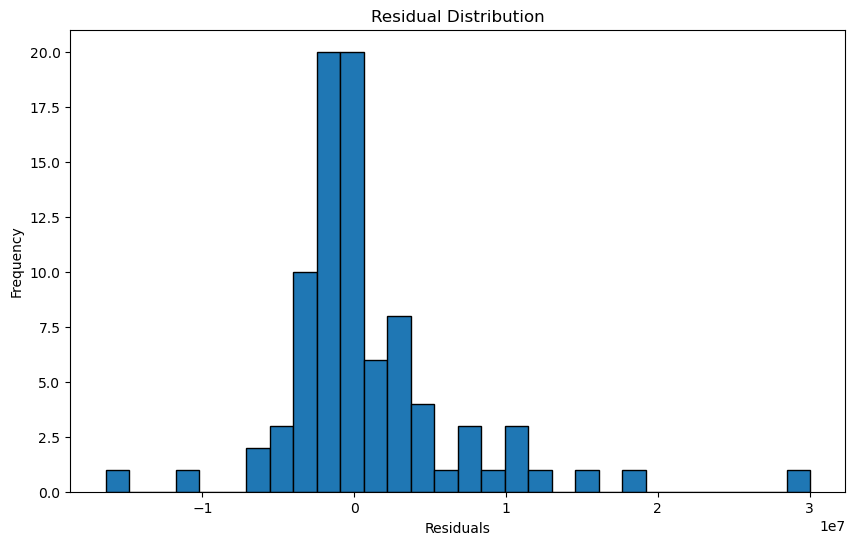

Mean of Residuals: 771507.5
Standard Deviation of Residuals: 5877380.7


In [15]:
residuals = y_test - y_pred

plt.figure(figsize = (10, 6))
plt.scatter(y_pred, residuals, alpha = 0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.show()

plt.figure(figsize = (10, 6))
plt.hist(residuals, bins = 30, edgecolor = 'k')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

residual_mean = residuals.mean()
residual_std = residuals.std()
print(f'Mean of Residuals: {residual_mean:.1f}')
print(f'Standard Deviation of Residuals: {residual_std:.1f}')

In [16]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
df_feature_importance = pd.DataFrame({'Feature' : feature_names, 'Importance' : feature_importances})
df_feature_importance = df_feature_importance.sort_values(by = 'Importance', ascending = False)

df_feature_importance.head()

,Feature,Importance
3,MP,0.203851
0,Age,0.174132
23,TOV,0.094809
11,2PA,0.069082
5,FGA,0.047018


In [17]:
df_pred['Absolute Difference'] = df_pred['Actual Salary'] - df_pred['Predicted Salary']
df_pred['Percentage Difference'] = (df_pred['Absolute Difference'] / df_pred['Predicted Salary']) * 100

df_pred.sort_values(by = 'Percentage Difference', ascending = False)

,Player Name,Actual Salary,Predicted Salary,Absolute Difference,Percentage Difference
70,Jonathan Isaac,17400000,2422710.25,14977289.75,618.203921
17,Kemba Walker,37281261,7253883.00,30027378.00,413.949026
76,Duncan Robinson,16902000,6427978.24,10474021.76,162.944263
78,Collin Sexton,16700000,6716948.84,9983051.16,148.624791
125,James Wiseman,9603360,4463662.27,5139697.73,115.145309
...,...,...,...,...,...
456,Xavier Sneed,102910,661205.59,-558295.59,-84.436006
430,Orlando Robinson,386055,2770458.30,-2384403.30,-86.065302
455,Jarrell Brantley,105522,1181232.75,-1075710.75,-91.066790
461,Jay Scrubb,49719,1868270.37,-1818551.37,-97.338768


### Does the player's performance meet the salary level?
The playing time and age are important indicators that influence a player's salary in the NBA. The actual salaries of Jonathan Isaac and Kemba Walker are significantly higher than the predicted salaries, which indicates that their performance did not meet the expected level. Through this analysis, we can attempt to understand the relationship between player performance and salary.